In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [13]:
# Folder containing CSV files
folder_path = "C:\\Users\\krits\\vscodeWorkspaces\\Jupyter_Notebook\\LSTM_Model\\CSV_SIGNAL\\CSV_2\\*.csv"

# Get list of all CSV files
csv_files = glob.glob(folder_path)

# Read all CSVs into a list of DataFrames
dfs = [pd.read_csv(file, parse_dates=['DateTime']) for file in csv_files]

# Optionally, concatenate all CSVs into one DataFrame
# combined_df = pd.concat(dfs, ignore_index=True)
df_for_save = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
# print(combined_df)
print(df_for_save)


                DateTime             Name  HV_SwitchingFreq_Rail1  \
0    2025-03-20 09:59:33  280_380V_10A_10                     300   
1    2025-03-20 09:59:35  280_380V_10A_10                     300   
2    2025-03-20 09:59:36  280_380V_10A_10                     300   
3    2025-03-20 09:59:36  280_380V_10A_10                     300   
4    2025-03-20 09:59:37  280_380V_10A_10                     300   
...                  ...              ...                     ...   
4057 2025-03-20 15:40:03    280_380V_5A_9                     300   
4058 2025-03-20 15:40:03    280_380V_5A_9                     300   
4059 2025-03-20 15:40:04    280_380V_5A_9                     300   
4060 2025-03-20 15:40:05    280_380V_5A_9                     300   
4061 2025-03-20 15:40:05    280_380V_5A_9                     300   

      VS_Bulk_HvDc  CS_Shunt_HVDC_R1  HV_OutPwr  VS_Vout_Sense_HVDC  \
0            154.7              0.08       22.0               279.4   
1            154.0           

In [14]:
df_for_save

,DateTime,Name,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,Unnamed: 9
0,2025-03-20 09:59:33,280_380V_10A_10,300,154.7,0.08,22.0,279.4,0.0,218.5,NaN
1,2025-03-20 09:59:35,280_380V_10A_10,300,154.0,0.08,22.0,279.4,0.0,218.5,NaN
2,2025-03-20 09:59:36,280_380V_10A_10,300,153.4,0.09,22.0,279.4,0.0,218.5,NaN
3,2025-03-20 09:59:36,280_380V_10A_10,300,339.5,0.09,25.0,279.4,0.5,219.0,NaN
4,2025-03-20 09:59:37,280_380V_10A_10,300,550.9,0.08,25.0,279.4,0.6,219.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4057,2025-03-20 15:40:03,280_380V_5A_9,300,688.0,5.00,1397.0,279.4,2.2,219.0,NaN
4058,2025-03-20 15:40:03,280_380V_5A_9,300,687.5,5.00,1397.0,279.8,2.2,219.0,NaN
4059,2025-03-20 15:40:04,280_380V_5A_9,300,688.6,4.99,1396.0,279.4,2.2,219.0,NaN
4060,2025-03-20 15:40:05,280_380V_5A_9,300,688.5,5.00,1397.0,279.4,2.1,219.0,NaN


In [15]:
# Load CSV file
file_path = "C:\\Users\\krits\\vscodeWorkspaces\\Jupyter_Notebook\\LSTM_Model\\CSV_SIGNAL\\CSV_2\\20250320_280_380V_10A_4.csv"  # Change this to your actual file path
df = pd.read_csv(file_path, parse_dates=['DateTime'])
# df_for_save = pd.read_csv(file_path, parse_dates=['DateTime'])
# Set DateTime as index for better plotting
df.set_index("DateTime", inplace=True)

# Display first few rows
# print(df.head())

# Basic statistics
# print(df.describe())

In [16]:
df

,Name,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,Unnamed: 9
DateTime,,,,,,,,,
2025-03-20 09:10:52,280_380V_10A_4,300,1.8,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:54,280_380V_10A_4,300,2.0,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:55,280_380V_10A_4,300,2.0,0.09,25.0,279.4,0.0,219.0,NaN
2025-03-20 09:10:55,280_380V_10A_4,300,19.0,0.09,25.0,279.4,0.4,219.0,NaN
2025-03-20 09:10:56,280_380V_10A_4,300,435.7,0.09,25.0,279.4,0.5,219.0,NaN
...,...,...,...,...,...,...,...,...,...
2025-03-20 09:12:40,280_380V_10A_4,233,703.0,9.99,2795.0,279.5,4.4,218.5,NaN
2025-03-20 09:12:41,280_380V_10A_4,232,703.2,9.99,2795.0,279.5,4.4,218.5,NaN
2025-03-20 09:12:41,280_380V_10A_4,232,702.7,9.99,2795.0,279.6,4.4,218.5,NaN


In [17]:
df.drop(columns=["Name", "Unnamed: 9"], inplace=True)
df_for_save.drop(columns=["Name", "Unnamed: 9"], inplace=True)

In [18]:
df.drop(df.index[-1], inplace=True)
df_for_save.drop(df_for_save.index[-1], inplace=True)

In [19]:
df

,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
DateTime,,,,,,,
2025-03-20 09:10:52,300,1.8,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:54,300,2.0,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:55,300,2.0,0.09,25.0,279.4,0.0,219.0
2025-03-20 09:10:55,300,19.0,0.09,25.0,279.4,0.4,219.0
2025-03-20 09:10:56,300,435.7,0.09,25.0,279.4,0.5,219.0
...,...,...,...,...,...,...,...
2025-03-20 09:12:39,232,702.6,9.99,2796.0,279.6,4.4,219.0
2025-03-20 09:12:40,233,703.0,9.99,2795.0,279.5,4.4,218.5
2025-03-20 09:12:41,232,703.2,9.99,2795.0,279.5,4.4,218.5


In [20]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,2025-03-20 09:59:33,300,154.7,0.08,22.0,279.4,0.0,218.5
1,2025-03-20 09:59:35,300,154.0,0.08,22.0,279.4,0.0,218.5
2,2025-03-20 09:59:36,300,153.4,0.09,22.0,279.4,0.0,218.5
3,2025-03-20 09:59:36,300,339.5,0.09,25.0,279.4,0.5,219.0
4,2025-03-20 09:59:37,300,550.9,0.08,25.0,279.4,0.6,219.0
...,...,...,...,...,...,...,...,...
4056,2025-03-20 15:40:02,300,686.7,5.00,1394.0,279.4,2.2,219.0
4057,2025-03-20 15:40:03,300,688.0,5.00,1397.0,279.4,2.2,219.0
4058,2025-03-20 15:40:03,300,687.5,5.00,1397.0,279.8,2.2,219.0
4059,2025-03-20 15:40:04,300,688.6,4.99,1396.0,279.4,2.2,219.0


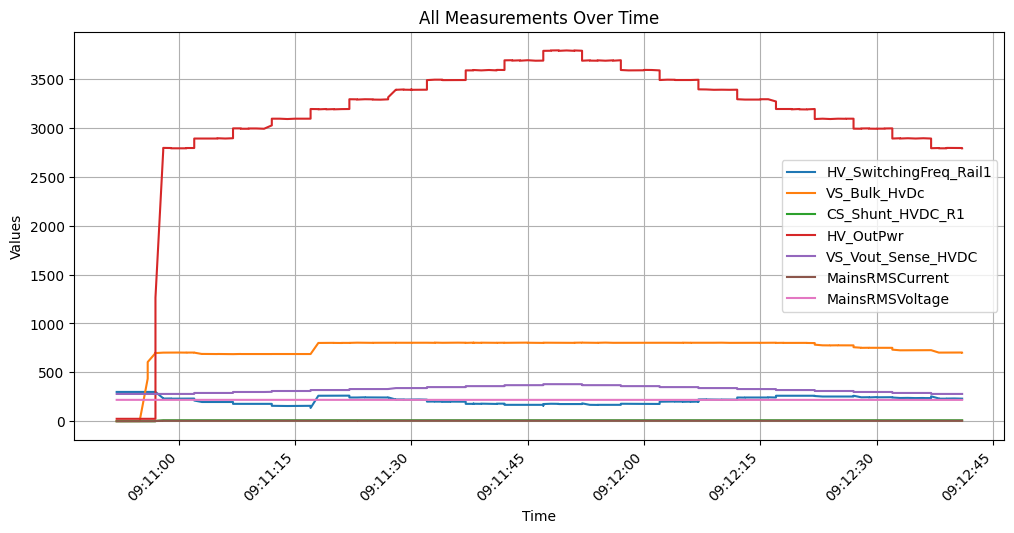

In [21]:
# Plot all numerical columns
df.plot(figsize=(12, 6), marker='', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("All Measurements Over Time")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

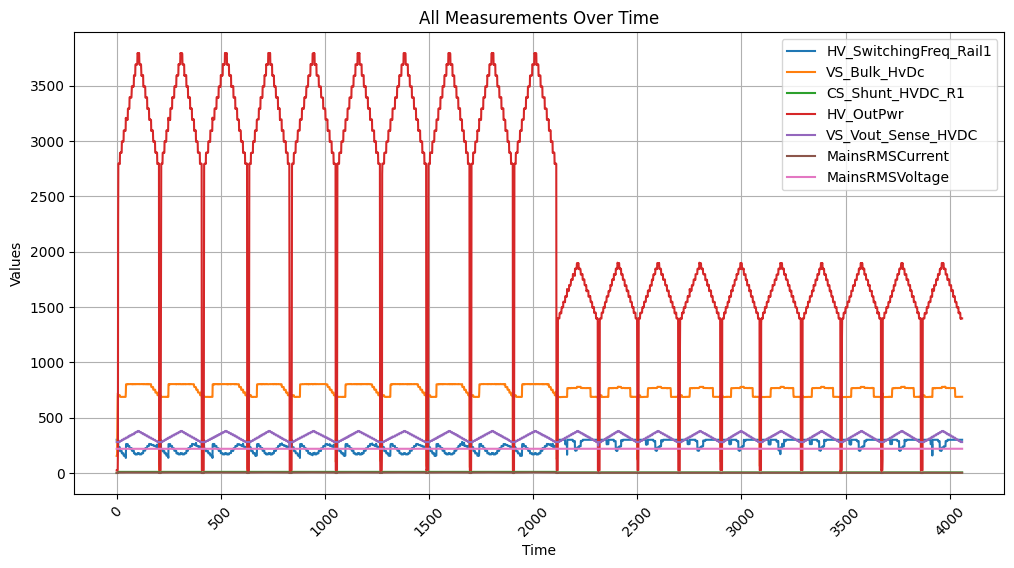

In [22]:
# Plot all numerical columns
df_for_save.drop(columns='DateTime').plot(figsize=(12, 6), marker='', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("All Measurements Over Time")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
df_for_save['DateTime'][len(df_for_save)-1]

Timestamp('2025-03-20 15:40:05')

In [24]:
import numpy as np
import pandas as pd

# Assuming df is already defined and the 'DateTime' column is in datetime format

# 2. Get the number of rows in the DataFrame
num_rows = len(df_for_save)

# 1. Calculate the total time difference in seconds between the first and last DateTime
time_diff_seconds = (df_for_save['DateTime'][num_rows - 1] - df_for_save['DateTime'][0]).total_seconds()
print(f"Diff time {time_diff_seconds}")


# 3. Generate the line using np.linspace
line = np.linspace(0, time_diff_seconds, num_rows)

# 4. Append the generated line as a new column to the DataFrame
df_for_save['TimeLine'] = line

# Display the updated DataFrame
print(df_for_save.head())


Diff time 20432.0
             DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  CS_Shunt_HVDC_R1  \
0 2025-03-20 09:59:33                     300         154.7              0.08   
1 2025-03-20 09:59:35                     300         154.0              0.08   
2 2025-03-20 09:59:36                     300         153.4              0.09   
3 2025-03-20 09:59:36                     300         339.5              0.09   
4 2025-03-20 09:59:37                     300         550.9              0.08   

   HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  MainsRMSVoltage   TimeLine  
0       22.0               279.4              0.0            218.5   0.000000  
1       22.0               279.4              0.0            218.5   5.032512  
2       22.0               279.4              0.0            218.5  10.065025  
3       25.0               279.4              0.5            219.0  15.097537  
4       25.0               279.4              0.6            219.0  20.130049  


In [25]:
df_for_save

,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,TimeLine
0,2025-03-20 09:59:33,300,154.7,0.08,22.0,279.4,0.0,218.5,0.000000
1,2025-03-20 09:59:35,300,154.0,0.08,22.0,279.4,0.0,218.5,5.032512
2,2025-03-20 09:59:36,300,153.4,0.09,22.0,279.4,0.0,218.5,10.065025
3,2025-03-20 09:59:36,300,339.5,0.09,25.0,279.4,0.5,219.0,15.097537
4,2025-03-20 09:59:37,300,550.9,0.08,25.0,279.4,0.6,219.0,20.130049
...,...,...,...,...,...,...,...,...,...
4056,2025-03-20 15:40:02,300,686.7,5.00,1394.0,279.4,2.2,219.0,20411.869951
4057,2025-03-20 15:40:03,300,688.0,5.00,1397.0,279.4,2.2,219.0,20416.902463
4058,2025-03-20 15:40:03,300,687.5,5.00,1397.0,279.8,2.2,219.0,20421.934975
4059,2025-03-20 15:40:04,300,688.6,4.99,1396.0,279.4,2.2,219.0,20426.967488


In [26]:
# Remove the 'DateTime' column (it is now the index)
# df.reset_index(drop=True, inplace=True)

In [27]:
# Reorder columns to make 'TimeLine' the first column
cols = ['TimeLine'] + [col for col in df_for_save.columns if col != 'TimeLine']
df_for_save = df_for_save[cols]

# Display the updated DataFrame
print(df_for_save.head())

    TimeLine            DateTime  HV_SwitchingFreq_Rail1  VS_Bulk_HvDc  \
0   0.000000 2025-03-20 09:59:33                     300         154.7   
1   5.032512 2025-03-20 09:59:35                     300         154.0   
2  10.065025 2025-03-20 09:59:36                     300         153.4   
3  15.097537 2025-03-20 09:59:36                     300         339.5   
4  20.130049 2025-03-20 09:59:37                     300         550.9   

   CS_Shunt_HVDC_R1  HV_OutPwr  VS_Vout_Sense_HVDC  MainsRMSCurrent  \
0              0.08       22.0               279.4              0.0   
1              0.08       22.0               279.4              0.0   
2              0.09       22.0               279.4              0.0   
3              0.09       25.0               279.4              0.5   
4              0.08       25.0               279.4              0.6   

   MainsRMSVoltage  
0            218.5  
1            218.5  
2            218.5  
3            219.0  
4            219.0  


In [28]:
df_for_save

,TimeLine,DateTime,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,2025-03-20 09:59:33,300,154.7,0.08,22.0,279.4,0.0,218.5
1,5.032512,2025-03-20 09:59:35,300,154.0,0.08,22.0,279.4,0.0,218.5
2,10.065025,2025-03-20 09:59:36,300,153.4,0.09,22.0,279.4,0.0,218.5
3,15.097537,2025-03-20 09:59:36,300,339.5,0.09,25.0,279.4,0.5,219.0
4,20.130049,2025-03-20 09:59:37,300,550.9,0.08,25.0,279.4,0.6,219.0
...,...,...,...,...,...,...,...,...,...
4056,20411.869951,2025-03-20 15:40:02,300,686.7,5.00,1394.0,279.4,2.2,219.0
4057,20416.902463,2025-03-20 15:40:03,300,688.0,5.00,1397.0,279.4,2.2,219.0
4058,20421.934975,2025-03-20 15:40:03,300,687.5,5.00,1397.0,279.8,2.2,219.0
4059,20426.967488,2025-03-20 15:40:04,300,688.6,4.99,1396.0,279.4,2.2,219.0


In [29]:
df_for_save.drop(columns="DateTime", inplace=True)

C:\Users\krits\AppData\Local\Temp\ipykernel_2956\1144685524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_save.drop(columns="DateTime", inplace=True)


In [30]:
df_for_save.reset_index(drop=True, inplace=True)

In [31]:
df_for_save

,TimeLine,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,0.000000,300,154.7,0.08,22.0,279.4,0.0,218.5
1,5.032512,300,154.0,0.08,22.0,279.4,0.0,218.5
2,10.065025,300,153.4,0.09,22.0,279.4,0.0,218.5
3,15.097537,300,339.5,0.09,25.0,279.4,0.5,219.0
4,20.130049,300,550.9,0.08,25.0,279.4,0.6,219.0
...,...,...,...,...,...,...,...,...
4056,20411.869951,300,686.7,5.00,1394.0,279.4,2.2,219.0
4057,20416.902463,300,688.0,5.00,1397.0,279.4,2.2,219.0
4058,20421.934975,300,687.5,5.00,1397.0,279.8,2.2,219.0
4059,20426.967488,300,688.6,4.99,1396.0,279.4,2.2,219.0


In [32]:
filepath = "Test.csv"
df_for_save.to_csv(filepath)  